In [1]:
import pandas as pd  # Importing the pandas library for data manipulation
import numpy as np  # Importing the numpy library for numerical operations
import seaborn as sns # Importing the seaborn library for data visualization
import matplotlib.pyplot as plt # Importing the matplotlib library for plotting
from pandas.plotting import scatter_matrix # Importing scatter_matrix function from pandas.plotting module

In [2]:
# Load the dataset into a DataFrame
data = pd.read_csv('melb_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Data Preprocessing

In [3]:
# Getting the data types of each column in the 'data' DataFrame
column_types = data.dtypes

# Print the column types
print(column_types)

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object


In [4]:
# Check for missing values in each column
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [5]:
# We are removing specific columns from the dataset due to a significant number of null values in those columns. 
#This removal enhances the effectiveness of our data set for analysis and modeling purposes.
columns_to_remove = ['BuildingArea', 'YearBuilt','CouncilArea']
data = data.drop(columns_to_remove, axis=1)  # Drop Columns with missing values

In [6]:
data.shape

(13580, 18)

In [7]:
# Convert the date string to datetime
date = pd.to_datetime(data['Date'], format="%d/%m/%Y", dayfirst=True)

# Data Analysis

In [8]:
# Generating descriptive statistics of the 'data' DataFrame
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,-37.408530,145.526350,21650.000000


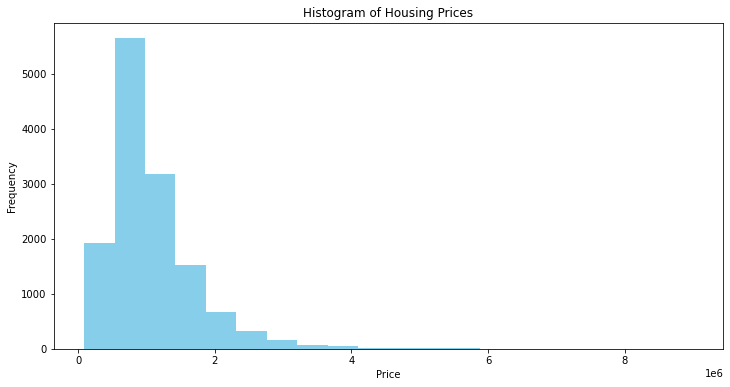

In [9]:
# Generate a histogram
plt.figure(figsize=(12, 6))
plt.hist(data['Price'], bins=20, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Prices')
plt.show()


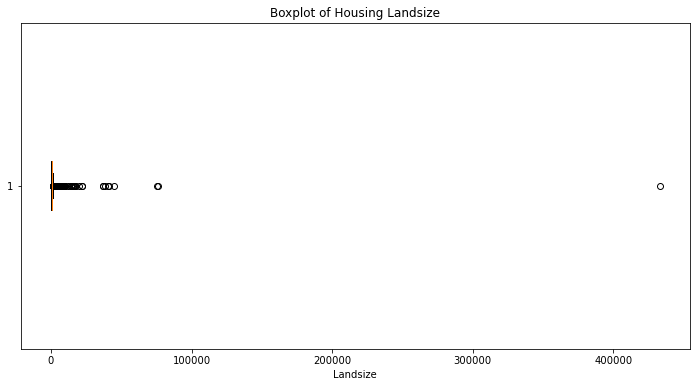

In [10]:
# Generate a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(data['Landsize'], vert=False)
plt.xlabel('Landsize')
plt.title('Boxplot of Housing Landsize')
plt.show()

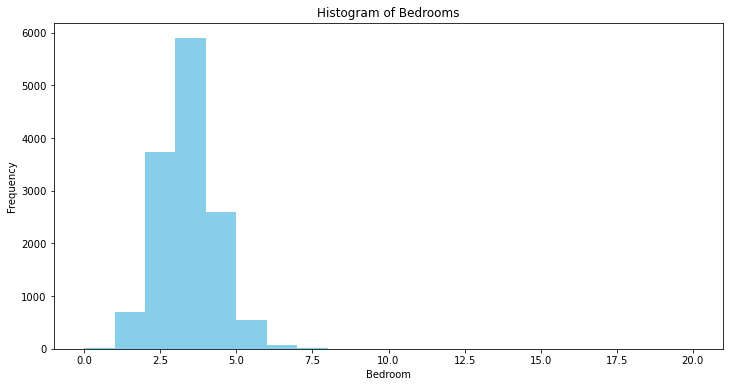

In [11]:
# Generate a histogram
plt.figure(figsize=(12, 6))
plt.hist(data['Bedroom2'], bins=20, color='skyblue')
plt.xlabel('Bedroom')
plt.ylabel('Frequency')
plt.title('Histogram of Bedrooms')
plt.show()

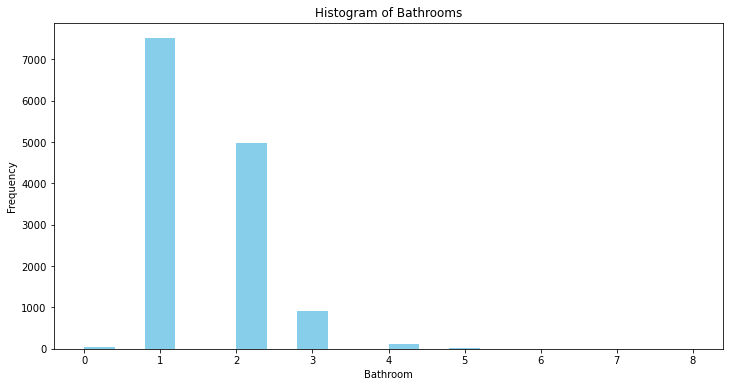

In [12]:
# Generate a histogram
plt.figure(figsize=(12, 6))
plt.hist(data['Bathroom'], bins=20, color='skyblue')
plt.xlabel('Bathroom')
plt.ylabel('Frequency')
plt.title('Histogram of Bathrooms')
plt.show()

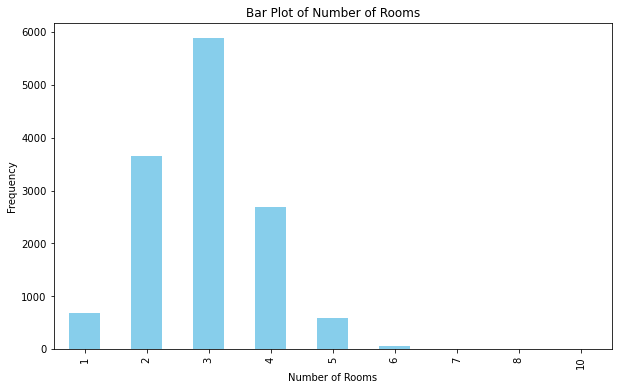

In [13]:
rooms_data = data['Rooms']

# Count the frequency of each unique value in 'Rooms' column
room_counts = rooms_data.value_counts().sort_index()

# Generate a bar plot
plt.figure(figsize=(10, 6))
room_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.title('Bar Plot of Number of Rooms')
plt.show()

In [14]:
# Creating a list of variables of interest that you want to analyze from the 'data' DataFrame
variables_of_interest = ['Rooms','Price','Distance','Postcode','Bedroom2','Bathroom','Landsize','Lattitude','Longtitude','Propertycount']

# Selecting only the columns of interest from the 'data' DataFrame
selected_data = data[variables_of_interest]

In [15]:
# Calculating the correlation matrix of the selected_data DataFrame
correlation_matrix = selected_data.corr()

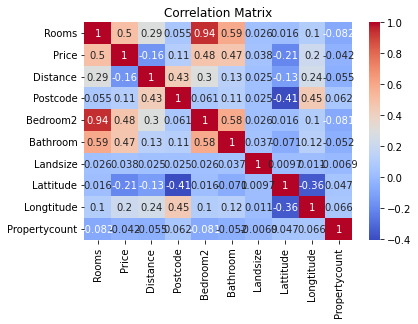

In [16]:
# Creating a heatmap using seaborn to visualize the correlation matrix, with annotations and a coolwarm color map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix') # Adding a title to the heatmap plot
plt.show()

In [17]:
print(correlation_matrix)

                  Rooms     Price  Distance  Postcode  Bedroom2  Bathroom  \
Rooms          1.000000  0.496634  0.294203  0.055303  0.944190  0.592934   
Price          0.496634  1.000000 -0.162522  0.107867  0.475951  0.467038   
Distance       0.294203 -0.162522  1.000000  0.431514  0.295927  0.127155   
Postcode       0.055303  0.107867  0.431514  1.000000  0.060584  0.113664   
Bedroom2       0.944190  0.475951  0.295927  0.060584  1.000000  0.584685   
Bathroom       0.592934  0.467038  0.127155  0.113664  0.584685  1.000000   
Landsize       0.025678  0.037507  0.025004  0.024558  0.025646  0.037130   
Lattitude      0.015948 -0.212934 -0.130723 -0.406104  0.015925 -0.070594   
Longtitude     0.100771  0.203656  0.239425  0.445357  0.102238  0.118971   
Propertycount -0.081530 -0.042153 -0.054910  0.062304 -0.081350 -0.052201   

               Landsize  Lattitude  Longtitude  Propertycount  
Rooms          0.025678   0.015948    0.100771      -0.081530  
Price          0.037507 

In [18]:
#After applying corrrelation we identifying the important columns for our analysis are
#Rooms, Price, Distance, Bedroom2, bathroom, Longtitude

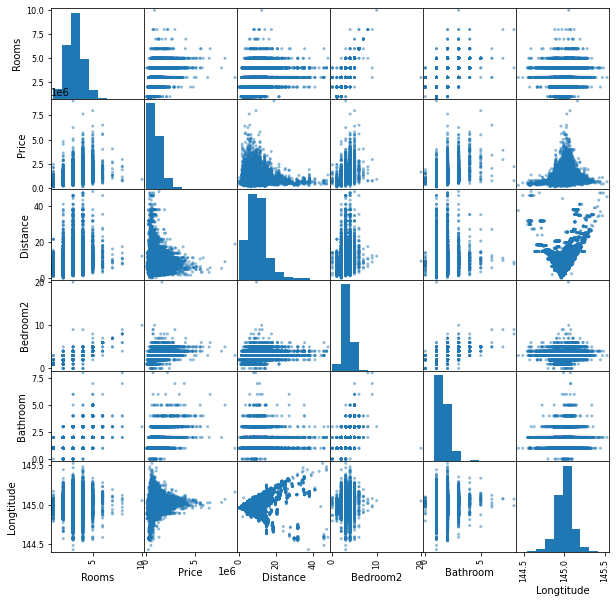

In [19]:
# Select the columns of interest
columns_of_interest = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Longtitude']

# Extract the data for the selected columns
data1 = data[columns_of_interest]

# Create the scatter plot matrix
scatter_matrix(data1, figsize=(10, 10), alpha=0.5)
plt.show()

In [20]:
# Grouping the 'data' DataFrame by 'Regionname' and calculating the mean price for each region, then sorting in descending order
region_prices = data.groupby('Regionname')['Price'].mean().sort_values(ascending=False)

In [21]:
# Grouping the 'data' DataFrame by 'Type' and calculating the mean price for each property type, then sorting in descending order
property_type_prices = data.groupby('Type')['Price'].mean().sort_values(ascending=False)

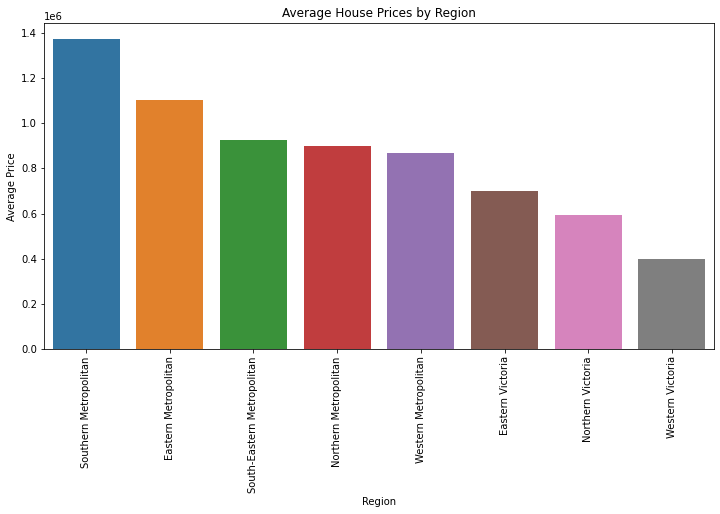

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_prices.index, y=region_prices.values)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average House Prices by Region')
plt.show()

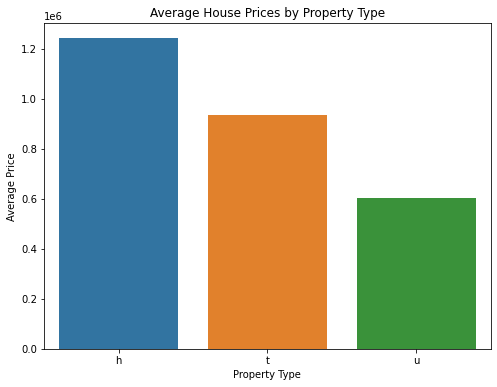

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x=property_type_prices.index, y=property_type_prices.values)
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.title('Average House Prices by Property Type')
plt.show()

In [24]:
# Grouping the 'data' DataFrame by 'Date' and calculating the mean price for each date
average_prices = data.groupby('Date')['Price'].mean()

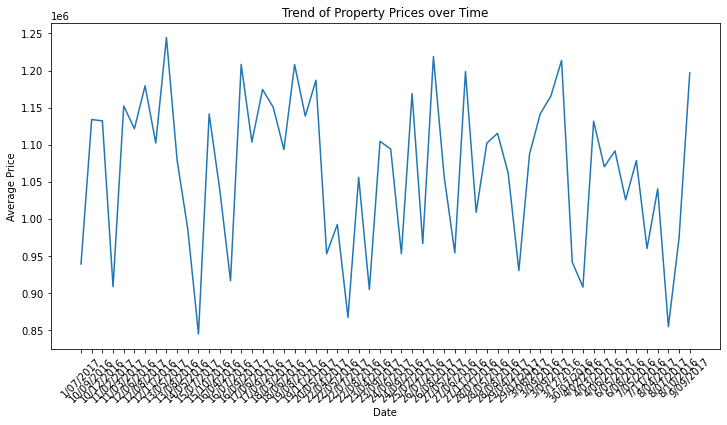

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(average_prices.index, average_prices.values)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Trend of Property Prices over Time')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Importing the train_test_split function from the sklearn.model_selection module
# This function is used to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Importing the LinearRegression class from the sklearn.linear_model module
# This class represents the linear regression algorithm used for modeling
from sklearn.linear_model import LinearRegression

# Importing the mean_squared_error and r2_score functions from the sklearn.metrics module
# These functions are used to evaluate the performance of a regression model
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Perform one-hot encoding on the 'Rooms' column
one_hot_encoded = pd.get_dummies(data['Rooms'], prefix='Rooms')
one_hot_encoded.replace({False: 0, True: 1}, inplace=True)

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([data, one_hot_encoded], axis=1)

df_numeric = df_encoded.select_dtypes(exclude=['object'])
print(df_numeric.head())

   Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0      2  1480000.0       2.5    3067.0       2.0       1.0  1.0     202.0   
1      2  1035000.0       2.5    3067.0       2.0       1.0  0.0     156.0   
2      3  1465000.0       2.5    3067.0       3.0       2.0  0.0     134.0   
3      3   850000.0       2.5    3067.0       3.0       2.0  1.0      94.0   
4      4  1600000.0       2.5    3067.0       3.0       1.0  2.0     120.0   

   Lattitude  Longtitude  Propertycount  Rooms_1  Rooms_2  Rooms_3  Rooms_4  \
0   -37.7996    144.9984         4019.0        0        1        0        0   
1   -37.8079    144.9934         4019.0        0        1        0        0   
2   -37.8093    144.9944         4019.0        0        0        1        0   
3   -37.7969    144.9969         4019.0        0        0        1        0   
4   -37.8072    144.9941         4019.0        0        0        0        1   

   Rooms_5  Rooms_6  Rooms_7  Rooms_8  Rooms_10  
0     

In [28]:
# Select the features (independent variables) and target (dependent variable)
features = df_numeric.drop(['Price'], axis=1)  # Drop the target variable
target = df_numeric['Price']

In [29]:
# Handling missing values
features.fillna(features.mean(), inplace=True)

In [30]:
# Checking for infinity values and extremely large values
features = np.clip(features, -np.finfo(np.float64).max, np.finfo(np.float64).max)

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 203933287954.6352
R-squared: 0.4865906969877408


In [32]:
# Step 1: Import the necessary libraries
from sklearn.svm import SVR  # Importing the SVR class from sklearn.svm module
from sklearn.model_selection import train_test_split  # Importing train_test_split function from sklearn.model_selection module
from sklearn.metrics import mean_squared_error, r2_score  # Importing mean_squared_error and r2_score functions from sklearn.metrics module

In [33]:
# Select the features (independent variables) and target (dependent variable)
features = df_numeric.drop(['Price'], axis=1)  # Drop the target variable
target = df_numeric['Price']

In [34]:
# Handling missing values
features.fillna(features.mean(), inplace=True)

In [35]:
# Checking for infinity values and extremely large values
features = np.clip(features, -np.finfo(np.float64).max, np.finfo(np.float64).max)

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [37]:
# Step 4: Create and train the SVM model
model = SVR(kernel='linear')  # Create an instance of SVR with linear kernel
model.fit(X_train, y_train)  # Train the model using the training data

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)  # Use the trained model to make predictions on the test set

# Step 6: Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)  # Calculate the mean squared error
rmse = np.sqrt(mse)  # Calculate the root mean squared error
r2 = r2_score(y_test, y_pred)  # Calculate the R-squared score

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 416999011235.804
Root Mean Squared Error (RMSE): 645754.6060507846
R-squared (R2) Score: -0.0498098366510904


In [40]:
# Step 1: Import the necessary libraries
import xgboost as xgb  # Importing the xgboost library for XGBoost
from sklearn.model_selection import train_test_split  # Importing train_test_split function from sklearn.model_selection module
from sklearn.metrics import mean_squared_error, r2_score  # Importing mean_squared_error and r2_score functions from sklearn.metrics module

# Select the features (independent variables) and target (dependent variable)
features = df_numeric.drop(['Price'], axis=1)  # Drop the target variable
target = df_numeric['Price']

# Handling missing values
features.fillna(features.mean(), inplace=True)

# Checking for infinity values and extremely large values
features = np.clip(features, -np.finfo(np.float64).max, np.finfo(np.float64).max)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 4: Create and train the XGBoost model
model = xgb.XGBRegressor()  # Create an instance of XGBRegressor
model.fit(X_train, y_train)  # Train the model using the training data

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)  # Use the trained model to make predictions on the test set

# Step 6: Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)  # Calculate the mean squared error
rmse = np.sqrt(mse)  # Calculate the root mean squared error
r2 = r2_score(y_test, y_pred)  # Calculate the R-squared score

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 76504719104.39046
Root Mean Squared Error (RMSE): 276594.8645661927
R-squared (R2) Score: 0.807396649627543
